![](imagenes/UC_FMRI.jpg)

---

***Andres Eduardo Aracena Rangel***

---

# Mascara del liquido cefalorraquídeo

En el notebook ***visualizacion_mascara.ipynb*** se pudo demostrar como en principio podemos extraer una mascara del liquido cefalorraquídeo trabajando con las imagenes/matrices obtenidas del ***reconall*** de freesurfer; con los datos de ***wm.mgz*** y ***wm.seg.mgz***.

En esta oportunidad, vamos a extraer el volumen de la mascara del liquido cefalorraquídeo (mask_csf).

Recordemos que la ubicación de la carpeta de freesurfer

In [83]:
%ls /home/aracena/thesis_practica/tips_nibabel/3_recon-all_freesurfer/output/freesurfer/sub-01/mri/

antsdn.brain.mgz                         norm.mgz
aparc.a2009s+aseg.mgz                    nu.mgz
aparc+aseg.mgz                           orig/
aparc.DKTatlas+aseg.mgz                  orig.mgz
aseg.auto.mgz                            orig_nu.mgz
aseg.auto_noCCseg.label_intensities.txt  rawavg.mgz
aseg.auto_noCCseg.mgz                    rh.ribbon.mgz
aseg.mgz                                 ribbon.mgz
aseg.presurf.hypos.mgz                   segment.dat
aseg.presurf.mgz                         surface.defects.mgz
brain.finalsurfs.mgz                     T1.mgz
brainmask.auto.mgz                       talairach.label_intensities.txt
brainmask.mgz                            talairach.log
brain.mgz                                talairach_with_skull.log
ctrl_pts.mgz                             transforms/
filled.auto.mgz                          wm.asegedit.mgz
filled.mgz                               wm.mgz
lh.ribbon.mgz                            wmparc.mgz
mri_nu_correct.mni.log     

## Importamos librerias

In [84]:
import time # medir el tiempo de ejecución de nuestros programas
start = time.process_time()
inicio = time.time()

In [85]:
import os # El módulo os nos permite acceder a funcionalidades dependientes del Sistema Operativo
from os.path import join as opj # Este método concatena varios componentes de ruta con exactamente un separador de directorio(‘/’)
from matplotlib.figure import Figure
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage #para rotar img

## Definimos funciones

In [86]:
# Creamos una funcion para ingresar el corte/slice que se desea extraer
# Verificamos que el usuario ingrese un numero natural y que se encuentre entre los 
    # cortes de la imagen cargada
    
def ingresar_corte(name, v_ini, v_fin):
    while True:
        print('\n------------------------------------------\n')
        print('La imagen', name, 'posee', vol_fin, 'cortes/slices', '\n',
             'ingrese un valor entre 0 y', vol_fin)
        print('\n------------------------------------------')
        co_vo =  input('\n Ingrese el corte/slice que desea visualizar: ')
        ver_num = co_vo.isnumeric()
        if ver_num == True: 
            co_vo = int(co_vo) # covertimos a int para poder usar en sentencias
            if v_ini <= co_vo <= v_fin: # que se encuentre los volumenes
                print('\n------------------------------------------\n')
                print('El corte/slice', co_vo, 'sera visualizado')
                print('\n------------------------------------------')
                return co_vo
                break
            else:
                print('\nERROR. Se debe ingresar un numero natural y',
                          '\n entre la cantidad de cortes/slices')
        else:
            print('\nERROR. Se debe ingresar un numero natural y',
                          '\n entre la cantidad de cortes/slices')

## Definimos parámetros

In [87]:
# Ruta del directorio del proyecto
experiment_dir = '/home/aracena/thesis_practica/tips_nibabel/' 

# Ruta de resultados de recon-all de freesurfer con segmentaciones
freesurfer_dir = opj(experiment_dir,'3_recon-all_freesurfer','output','freesurfer','sub-01','mri')

'''
Ruta de la imagen segmentada de la materia blanca + liquido cefalorraquídeo
'''
path_wm_csf = opj(freesurfer_dir,'wm.mgz')

'''
Ruta de la imagen segmentada solo materia blanca
'''
path_wm = opj(freesurfer_dir,'wm.seg.mgz')

'''
Ruta donde se guardaran los resultados
'''
output_dir = opj(experiment_dir,'5_mascara_csf','output')

# Crear la carpeta de salida
os.system('mkdir -p %s'%output_dir)

0

## Cargamos las imagenes y creamos los objetos mask_X

In [88]:
mask_wm_csf = nib.load(path_wm_csf)

mask_wm = nib.load(path_wm)


'''
Atributos
'''

# Forma de la Matriz
form_mask_wm_csf = mask_wm_csf.shape # Atributo --> Forma Matriz
print('Forma de la matriz mask_wm_csf:', '\n', form_mask_wm_csf, '------>', '3D', '\n')

form_mask_wm = mask_wm.shape # Atributo --> Forma Matriz
print('Forma de la matriz mask_wm:', '\n', form_mask_wm, '------>', '3D', '\n')

Forma de la matriz mask_wm_csf: 
 (256, 256, 256) ------> 3D 

Forma de la matriz mask_wm: 
 (256, 256, 256) ------> 3D 



## Cargamos datos de las imagenes

In [89]:
datos_mask_wm_csf = mask_wm_csf.get_fdata()
datos_mask_wm = mask_wm.get_fdata()

'''
Algunos atributos de interes
'''

# Numero de elementos
linea = '\n-----------------------------\n'
print(linea)
print('Numero de elementos \n')
print(datos_mask_wm_csf.size, '<--- mask_wm_csf')
print(datos_mask_wm.size, '<--- mask_wm')
print(linea)

# Tipo de datos de las mascaras
print('Tipo de datos \n')
print(datos_mask_wm_csf.dtype, '<--- mask_wm_csf')
print(datos_mask_wm.dtype, '<--- mask_wm')
print(linea)

# Valor minimo de las mascaras
print('Valor minimo de las mascaras \n')
print(np.amin(datos_mask_wm_csf), '<--- mask_wm_csf')
print(np.amin(datos_mask_wm), '<--- mask_wm')
print(linea)

# Valor maximo de las mascaras
print('Valor maximo de las mascaras \n')
print(np.amax(datos_mask_wm_csf), '<--- mask_wm_csf')
print(np.amax(datos_mask_wm), '<--- mask_wm')

# dtype: buscar en google que es dtype , cargar el primer resultado


-----------------------------

Numero de elementos 

16777216 <--- mask_wm_csf
16777216 <--- mask_wm

-----------------------------

Tipo de datos 

float64 <--- mask_wm_csf
float64 <--- mask_wm

-----------------------------

Valor minimo de las mascaras 

0.0 <--- mask_wm_csf
0.0 <--- mask_wm

-----------------------------

Valor maximo de las mascaras 

250.0 <--- mask_wm_csf
230.0 <--- mask_wm


## Extraemos datos de la mascara de csf

In [90]:
# Ya que mask_csf y mask_wm_csf son extraidas de la misma imagen anatomica en el
# proceso de freesurfer, poseen la misma forma. Basta con usar uno de los atributos
# de estas mascaras para trabajar

i = form_mask_wm_csf[0]
j = form_mask_wm_csf[1]
k = form_mask_wm_csf[2]

mask_csf = np.zeros((i,j,k),int)

for k in range(form_mask_wm_csf[2]):
    for i in range(form_mask_wm_csf[0]):
        for j in range(form_mask_wm_csf[1]):
            mask_csf[i,j,k] = datos_mask_wm_csf[i,j,k] - datos_mask_wm[i,j,k]
            eva = mask_csf[i,j,k]
            if eva < 0:
                mask_csf[i,j,k] = 0
            else:
                mask_csf[i,j,k] = eva


# Valor minimo y maximo de la mascara de csf
print(linea)
print('Valor minimo y maximo de la mascara csf \n')
print(np.amin(mask_csf), '<--- minimo de mask_csf')
print(np.amax(mask_csf), '<--- maximo de mask_csf')
print(linea)


-----------------------------

Valor minimo y maximo de la mascara csf 

0 <--- minimo de mask_csf
250 <--- maximo de mask_csf

-----------------------------



## Binarización

In [91]:
for k in range(form_mask_wm_csf[2]):
    for i in range(form_mask_wm_csf[0]):
        for j in range(form_mask_wm_csf[1]):
            eva = mask_csf[i,j,k]
            if eva != 0:
                mask_csf[i,j,k] = 1
            else:
                mask_csf[i,j,k] = eva
            
# Valor minimo y maximo de la mascara de csf
print(linea)
print('Valor minimo y maximo de la mascara csf binarizada\n')
print(np.amin(mask_csf), '<--- minimo de mask_csf')
print(np.amax(mask_csf), '<--- maximo de mask_csf')
print(linea)


-----------------------------

Valor minimo y maximo de la mascara csf binarizada

0 <--- minimo de mask_csf
1 <--- maximo de mask_csf

-----------------------------



## Extraemos cortes de la mascara de csf

In [92]:
# Le indicamos al usuario que ingrese el corte/slice que desea extraer del
# volumen seleccionado

# Definimos los inputs de la funcion 'ingresar_corte'
name = 'mask_csf'
vol_in = 0 # volumen inicial --> v_ini
vol_fin = form_mask_wm_csf[2] # volumen final --> v_fin

# Usamos funcion
cor_sel = ingresar_corte(name,vol_in,vol_fin)


------------------------------------------

La imagen mask_csf posee 256 cortes/slices 
 ingrese un valor entre 0 y 256

------------------------------------------

 Ingrese el corte/slice que desea visualizar: 110

------------------------------------------

El corte/slice 110 sera visualizado

------------------------------------------


## Visualizamos los cortes

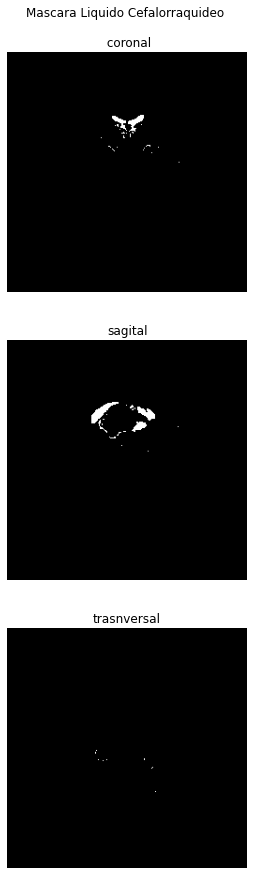

In [93]:
'''
corte coronal
'''
coro_csf = mask_csf[:, :,cor_sel]


#rotada
coro_csf_r = ndimage.rotate(coro_csf, -90, reshape=True)


'''
corte sagital
'''
sagi_csf = mask_csf[cor_sel,:, :]


#rotada
sagi_csf_r = ndimage.rotate(sagi_csf, 0, reshape=True)


'''
corte transversal
'''
tran_csf = mask_csf[:,cor_sel, :]

#rotada
tran_csf_r = ndimage.rotate(tran_csf, 90, reshape=True)



'''
Mostramos las imagenes
'''

fig = plt.figure(figsize=(15, 15))
plt.subplot(3,1,1)
plt.imshow(coro_csf_r,cmap='gray')
plt.title('Mascara Liquido Cefalorraquideo \n\n coronal')
plt.axis('off')
plt.subplot(3,1,2)
plt.imshow(sagi_csf_r,cmap='gray')
plt.title('sagital')
plt.axis('off')
plt.subplot(3,1,3)
plt.imshow(tran_csf_r,cmap='gray')
plt.title('trasnversal')
plt.axis('off')
fig.patch.set_facecolor('xkcd:white')
plt.show()

## Tiempo de ejecución del codigo

In [94]:
fin = time.time()
end = time.process_time()
tiempo = fin - inicio
tiempo2 = end - start

print('-----------------------------\n', 
      'tiempo de ejecución\n', tiempo, 'seg\n',
     '-----------------------------\n')
print('---------------------------------------\n', 
      'tiempo de ejecución del sistema y CPU\n', tiempo2, 'seg\n',
     '---------------------------------------\n')

-----------------------------
 tiempo de ejecución
 40.083579301834106 seg
 -----------------------------

---------------------------------------
 tiempo de ejecución del sistema y CPU
 29.829005574999996 seg
 ---------------------------------------



# FIN